# aula_6 = "Avaliação de Grupos"



## Como avaliar a formação de grupos

O processo de Análise de Clusters pode ser dividido em quatro partes, que podem ser revisitadas a qualquer momento, sendo elas: **Representação de Dados**, **Selecionar Medida de Proximidade**, **Selecionar Algoritmo** e **Avaliar os Grupos Encontrados**. 

Nosso foco será na última etapa: **Avaliar os Grupos Encontrados**.

*"A Validação das estruturas de grupos encontrados é a parte mais difícil e frustrante da Análise de Clusters. Sem um esforço consciente nessa direção, a Análise de Clusters continuara a ser uma Arte das Trevas, acessível apenas aos escolhidos, que possuem experiência e grande coragem." (Jain e Dubes, Algorithms for Clustering Data, 1988)*

Existem diferentes procedimentos para avaliar de maneira **objetiva** e **quantitativa** os resultados de análise de clustering.
Cada um desses procedimentos pode nos ajudar a responder uma ou mais questões do tipo:
* Encontramos grupos de fato?
* Grupos são pouco usuais ou facilmente encontrados ao acaso?
* Qual a qualidade (relativa ou absoluta) dos grupos encontrados?
* Qual é o número natural / mais apropriado de grupos?

Para validarmos de maneira **quantitativa** os grupos encontrados podemos utilizar métricas e indices. Esses índices podem ser divididos em 3 grupos:
* **Internos**: Avaliam o grau de compatibilidade entre a estrutura de grupos sob avaliação e os dados, usando apenas os próprios dados.
* **Relativos**: Avaliam qual dentre duas ou mais estruturas de grupos é melhor sob algum aspecto. Tipicamente são critérios internos capazes de quantificar a qualidade relativa.
* **Externos**: Avaliam o grau de correspondência entre a estrutura de grupos (partição ou hierarquia) sob avaliação e informação a priori na forma de uma solução de agrupamento esperada ou conhecida.


## Critérios de validação

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage


import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('data/tamanho_pinguins.csv')
data.sample(5)

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
134,Adelie,Dream,38.1,17.6,187.0,3425.0,FEMALE
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,MALE
144,Adelie,Dream,37.3,16.8,192.0,3000.0,FEMALE
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
178,Chinstrap,Dream,50.5,18.4,200.0,3400.0,FEMALE


In [5]:
# nesse caso iremos apenas apagar as linhas que possuem valores faltantes
data = data.dropna()

# excluir outliers
data = data[data.larg_bico_mm < 50]

In [6]:
X, y = data.iloc[:, 2:-1], data.iloc[:, 0]

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [7]:
x = X_[:, [0,2]]

In [8]:
x = X_[:, [0,2]]
kmeans = KMeans(n_clusters=2, random_state=3, n_init="auto").fit(x)
labels = kmeans.labels_

In [9]:
df_kmeans = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_kmeans['cluster'] = labels

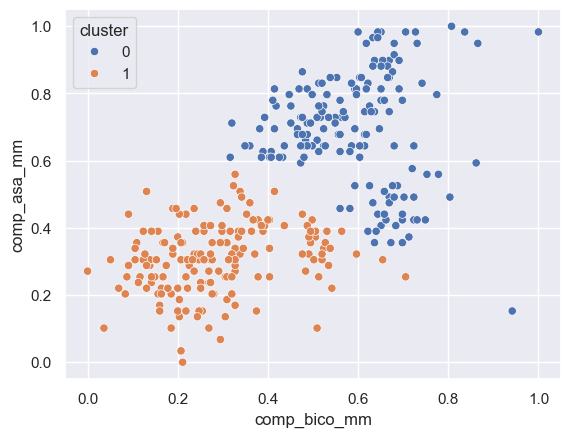

In [10]:
sns.scatterplot(data=df_kmeans, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");

In [11]:
db = DBSCAN(eps=.1, min_samples=7).fit(x)
labels = db.labels_

df_db = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_db['cluster'] = labels


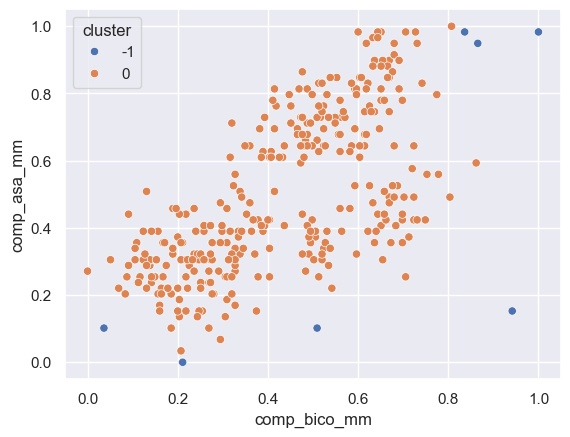

In [12]:
sns.scatterplot(data=df_db, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");

In [13]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

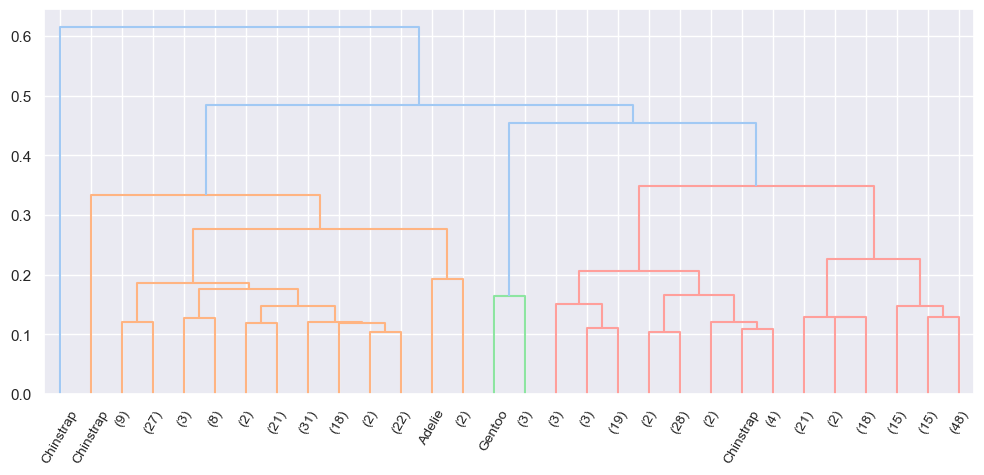

In [14]:
Z = linkage(x, method='centroid')

plt.figure(figsize=(12,5))
dendrogram(Z,  truncate_mode='lastp', labels=list(data.especie),
           orientation='top',
           leaf_font_size=10,leaf_rotation=60,);

## Critérios relativos

Avalia as estruturas de grupos encontradas, em geral variando parâmetros do mesmo algoritmo, como o número de clusters K no k-means, para determinar qual é a melhor sob algum aspecto. Normalmente é utilizado para determinar o número ideal de clusters.

### Silhueta (Silhouette Score)

É uma métrica utilizada para m

* **a** =  **Distância Média Intra-Cluster**, distância média de um ponto para todos os outros pontos do mesmo cluster
* **b** =  **Distância Média para o Cluster mais Próximo**, distância média de um ponto para todos os pontos do cluster mais próximo

Para cada ponto, ou observação, o valor da silhueta é calculado com a seguinte fórmula:

$$
S = \frac{(b-a)}{max(a,b)}\
$$

O valor da silhuetea varia entre -1 e 1. Se o valor for **1** significa que o cluster é denso e bem separado, **-1** implica que o ponto foi atribuído ao cluster errado.

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer
sns.set_theme(style="darkgrid", palette="pastel")

from sklearn import metrics

In [18]:
for i in range(2,6):
    kmeans_model = KMeans(n_clusters=i, random_state=42).fit(X_)
    labels = kmeans_model.labels_
    print(f"k={i} - silhueta={metrics.silhouette_score(X_, labels, metric='euclidean'):.3f}")

k=2 - silhueta=0.549
k=3 - silhueta=0.434
k=4 - silhueta=0.382
k=5 - silhueta=0.367


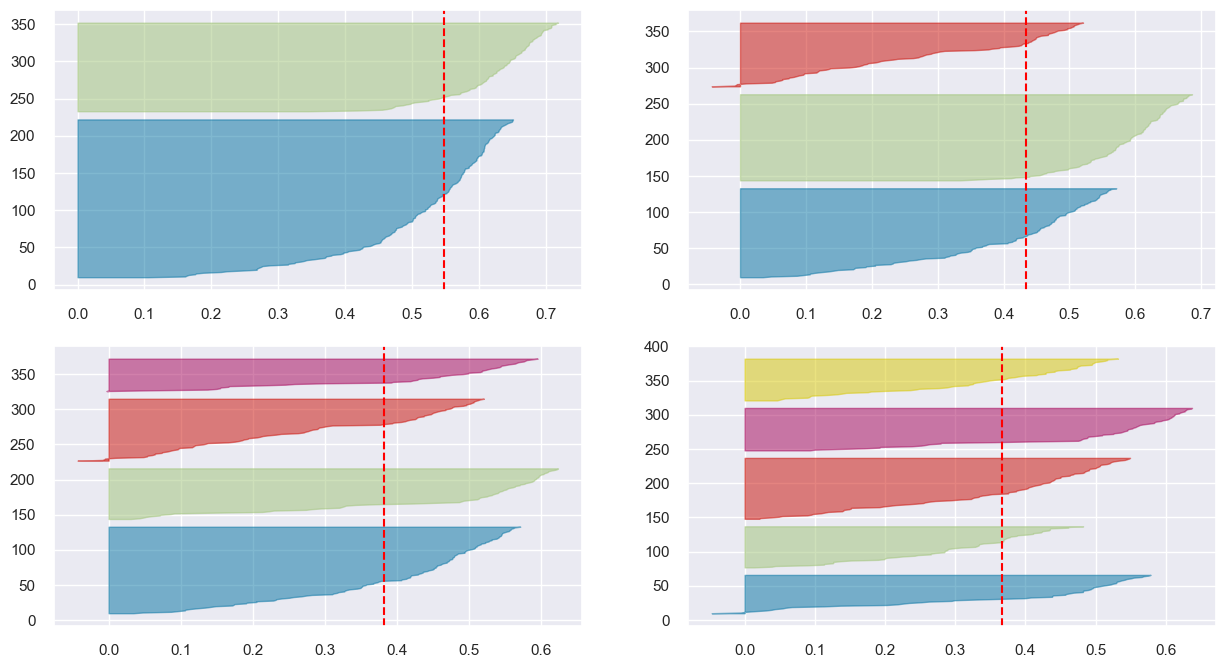

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Criar um modelo para cada um dos valores de k
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Criar um modelo de para visualizar a silhueta
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_) 

In [20]:
# silhouette_score para DBSCAN variando o raio
list_eps = [.02, .05, .07, .1]
for i in list_eps:
    db = DBSCAN(eps=i, min_samples=3).fit(X_)
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    if n_clusters_ > 1:
        silhueta = metrics.silhouette_score(X_, labels, metric='euclidean')
        print(f"eps={i}, clusters={n_clusters_}, silhueta={silhueta:.3f}, ruído={n_noise_}")
    else:
        print(f"1 cluster, ruído={list(labels).count(-1)}")

1 cluster, ruído=333
eps=0.05, clusters=5, silhueta=-0.454, ruído=317
eps=0.07, clusters=23, silhueta=-0.320, ruído=213
eps=0.1, clusters=3, silhueta=0.289, ruído=76


## Critérios internos

Avalia os grupos considerando apenas os dados utilizados e as informações geradas no processo de clusterização. Essa estratégia pode ser utilizada tanto para determinar o número ideal de clusters quanto para escolher o melhor algoritmo.

### Método do Cotovelo (Elbow Method)

A ideia do Método do Cotovelo é encontrar o número ideal de grupos em uma base de dados. Em algoritmos como o K-means o objetivo da clusterização é encontrar grupos em que as observações dentro de um grupo sejam parecidas entre si e o mais diferente possível das observações dos outros grupos. Para o Método do Cotovelo a quantidade de grupos ideal é a que minimiza a **soma dos quadrados das distâncias intra-clusters** (ou em inglês, *within clusters sum of squares, WCSS*)

$$
WCSS =\sum_{i=1}^{k} \sum_{x_j \in C_i}d(x_j,\overline{x}_i)^2 \
$$ 

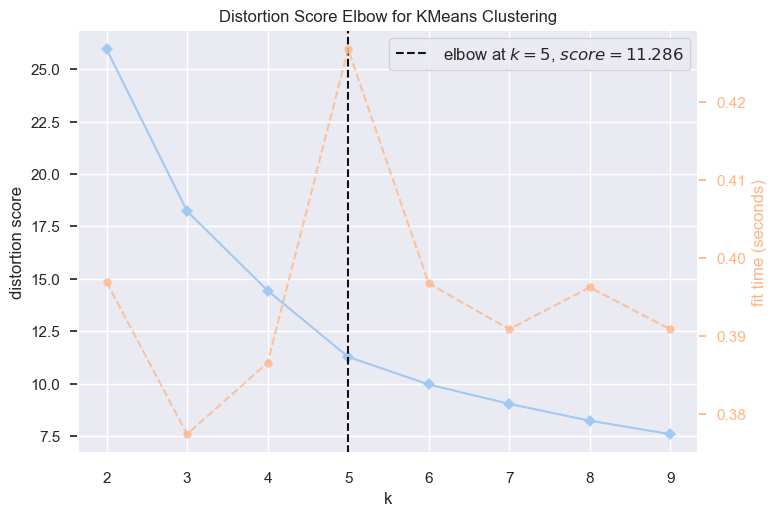

In [24]:
# KElbowVisualizer

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings= True)
visualizer.fit(X_) 
visualizer.show(); 

In [25]:
# KMeans com 5 clusters como dito pelo Elbow
x = X_[:, [0,2]]

kmeans = KMeans(n_clusters=5, random_state=3, n_init="auto").fit(X_)
labels = kmeans.labels_

df_kmeans = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_kmeans['cluster'] = labels

In [26]:
df_kmeans.head()

,comp_bico_mm,comp_asa_mm,cluster
0,0.254545,0.152542,2
1,0.269091,0.237288,2
2,0.298182,0.389831,2
3,0.167273,0.355932,3
4,0.261818,0.305085,3


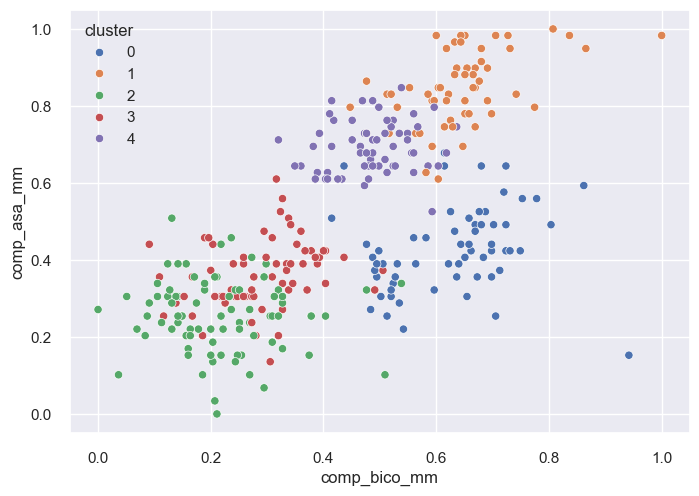

In [28]:
# estamos olhando em somente 2 dimensões, mas existem 4, por isso não fica boa essa visualização
sns.scatterplot(data=df_kmeans, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");

In [29]:
from sklearn.decomposition import PCA

# visualização 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_)

print(pca.explained_variance_ratio_)

[0.69609847 0.19189658]


In [30]:
df_pca = pd.DataFrame(pca_features, columns = ['component1', 'component2'])
df_pca['cluster'] = labels

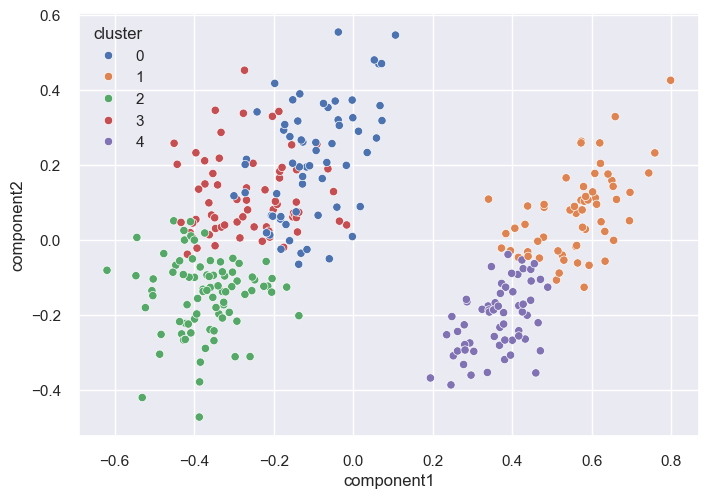

In [31]:
sns.scatterplot(data=df_pca, 
                x="component1", 
                y="component2", 
                hue="cluster", 
                palette="deep");

## Critérios externos

Avalia os grupos encontrados comparando-os com algum resultado externo conhecido, como, por exemplo, um gabarito com os grupos dos dados ou de um subconjunto. Como de largada o número de grupos já é conhecido, esses critérios são geralmente utilizados para definir qual é o melhor algoritmo a ser utilizado em uma base de dados especifica.

### Rand Index

É uma medida de similiaridade entre dois grupos. Ela quatifica o quão bem um algoritmo de agrupamento consegue segmentar a base de dados, dado que as classes corretas são conhecidas no todo ou em parte. Esse índice é calculado da seguinte forma:

$$
RI = \frac{a+b}{a+b+c+d}\
$$
Sendo que:
* **a** = Número de pares da mesma classe e do mesmo cluster
* **b** = Número de pares da mesma classe e de clusters distintos
* **c** = Número de pares de classes distintas e do mesmo cluster
* **d** = Número de pares de classes e clusters distintos

In [32]:
from sklearn import metrics

In [40]:
# k_means
for i in range(2,11):
    kmeans_model = KMeans(n_clusters=i, random_state=42)
    kmeans_model.fit(X_)

    labels = kmeans_model.labels_

    score = metrics.rand_score(labels_true=y, labels_pred=labels)
    
    print(f"k={i} - rand index={score:.2f}")

k=2 - rand index=0.82
k=3 - rand index=0.88
k=4 - rand index=0.82
k=5 - rand index=0.82
k=6 - rand index=0.80
k=7 - rand index=0.78
k=8 - rand index=0.76
k=9 - rand index=0.75
k=10 - rand index=0.74


In [42]:
# dbscan
list_eps = [.02, .05, .07, .1, 1.2]
for i in list_eps:
    db = DBSCAN(eps=i, min_samples=3).fit(X_)
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    rand_index = metrics.rand_score(y, labels)
    print(f"eps={i}, clusters={n_clusters_}, rand index={rand_index:.3f}, ruído={n_noise_}")

eps=0.02, clusters=0, rand index=0.359, ruído=333
eps=0.05, clusters=5, rand index=0.385, ruído=317
eps=0.07, clusters=23, rand index=0.548, ruído=213
eps=0.1, clusters=3, rand index=0.839, ruído=76
eps=1.2, clusters=1, rand index=0.359, ruído=0


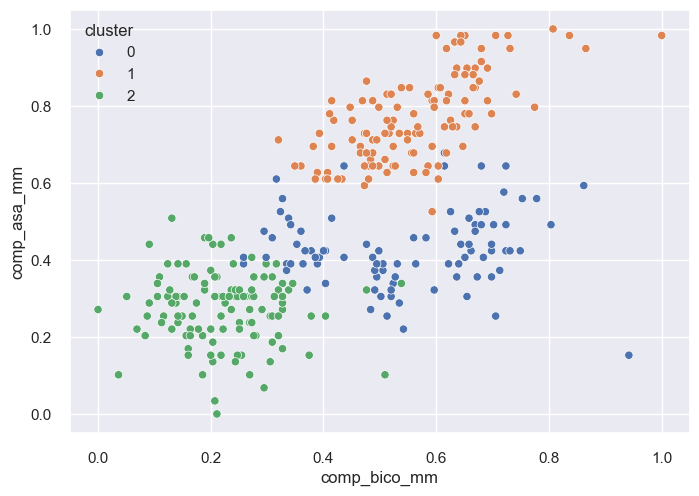

In [48]:
# KMeans com o melhor valor
x = X_[:, [0,2]]
kmeans = KMeans(n_clusters=3, random_state=3, n_init="auto").fit(X_)
labels = kmeans.labels_

df_kmeans = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_kmeans['cluster'] = labels

sns.scatterplot(data=df_kmeans, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");

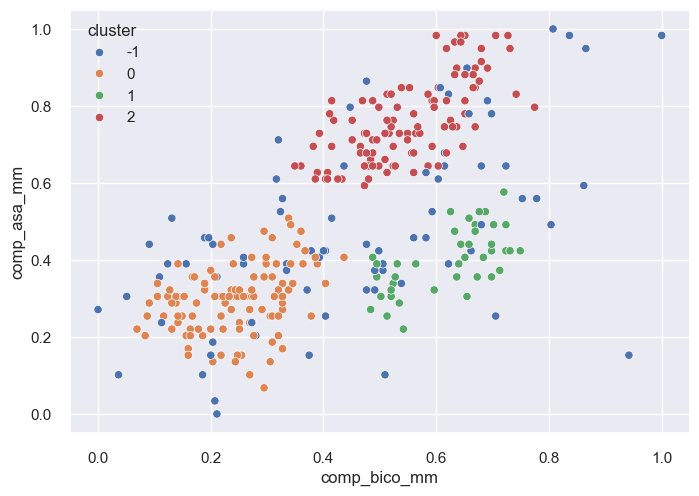

In [44]:
# DBSCAN com melhor valor 
db = DBSCAN(eps=.1, min_samples=3).fit(X_)
labels = db.labels_

df_db = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_db['cluster'] = labels

sns.scatterplot(data=df_db, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");

In [49]:
# PCA para melhor visualização (pode ser usado para dbscan e kmeans) (obs: KMeans ficou bem melhor)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_)

print(pca.explained_variance_ratio_)

[0.69609847 0.19189658]


In [50]:
df_pca = pd.DataFrame(pca_features, columns = ['component1', 'component2'])
df_pca['cluster'] = labels

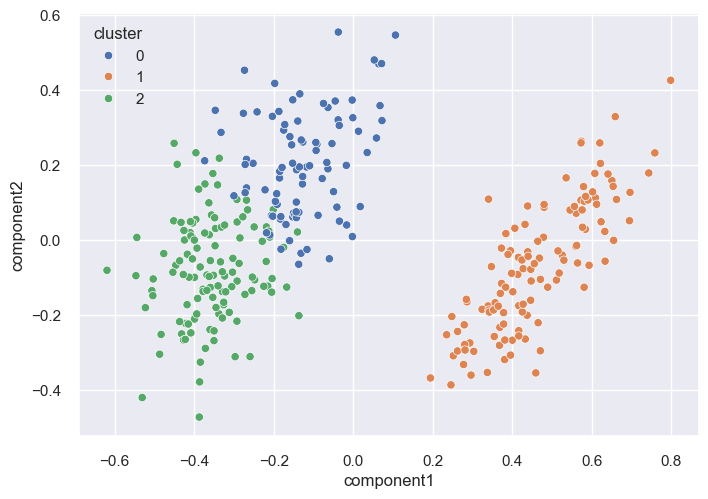

In [51]:
sns.scatterplot(data=df_pca, 
                x="component1", 
                y="component2", 
                hue="cluster", 
                palette="deep");